# LAB | Probability distributions

## Import libraries here

In [1]:
# Libraries
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

### Generate samples and test normal distribution.
- Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.
- Read the documentation for `scipy.stats.norm.rvs` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The function will help you create the normal random samples.

In [13]:
# Your code here
sample_size=[10, 50, 500, 5000]
samples = [stats.norm.rvs(loc=50, scale=5, size=size) for size in sample_size]

### Plot normal distributions.
- To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 
- Your output should look like the figure below:

![normal distributions with different sample sizes](images/ch-1.png)

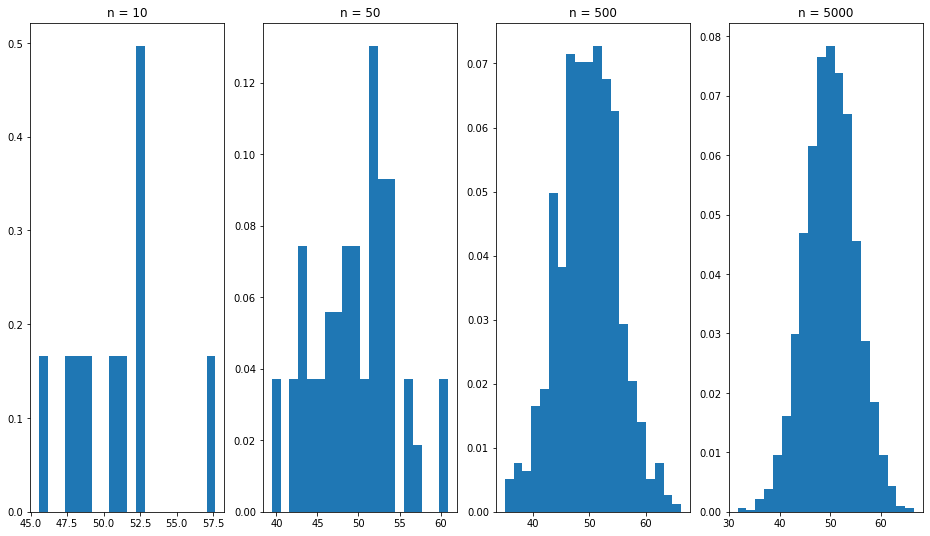

In [20]:
# Your code here
fig, axes = plt.subplots(1, 4, figsize = (16,9))

for i in range(4):
    axes[i].set_title('n = ' + str(sample_size[i]))
    axes[i].hist(samples[i], 20, density=True)

#### Compare the distributions above
- What do you observe? Explain with the Central Limit Theorem.

In [6]:
# Your answer here

`The Central Limit Theorem states that the sample mirrors de population. And the bigger the size of the sample is, the closer it gets to a normal distribution around the mean.`

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

- We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

####  Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.
```python
stats.binom(n, p)
```

In [41]:
# Your code here
n = 5 # people who watched the ad
p = 0.15 # probability of clicking an ad

dist = stats.binom(n, p)

#### Plot the PMF of the distribution. 
- Your output should look like the figure below:

![binom 10](images/ch-2.png)

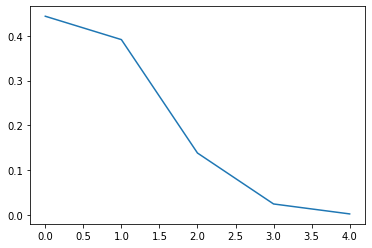

In [42]:
# Your code here
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above.

In [11]:
# Your answer here

`The odds for more than 1 person (of 5) click on the ad gets lower`

#### Now plot PMF with 50, 500, and 5000 visitors.
- To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.
- Your output should look like the figure below:
![prf](images/ch-2b.png)

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


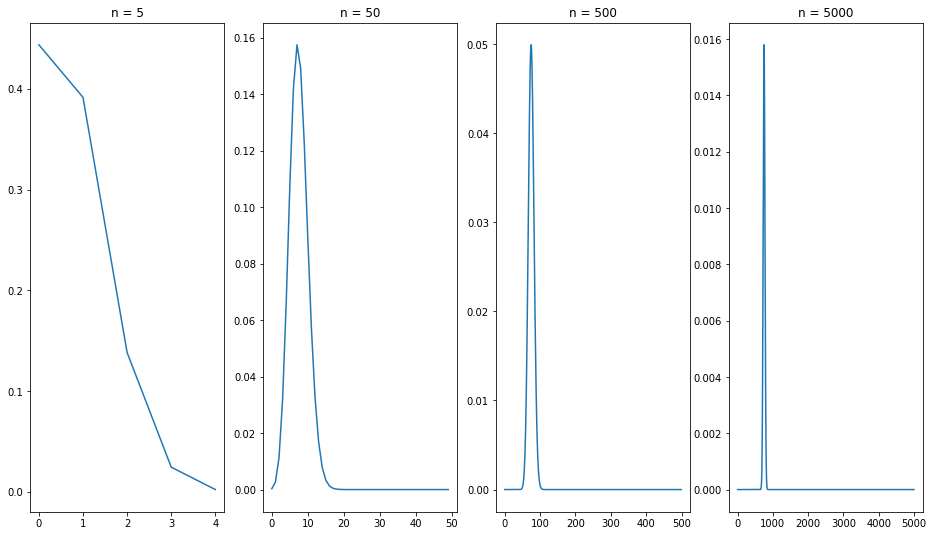

In [45]:
# Your code here
n = [5, 50, 500, 5000]
p = 0.15
x = [range(i) for i in n]

dist = [stats.binom(person, p) for person in n]

fig, axes = plt.subplots(1, 4, figsize = (16,9))
for i in range(4):
    axes[i].set_title('n = ' + str(n[i]))
    axes[i].plot(x[i], dist[i].pmf(x[i]))

#### What did you notice from the distribution plots?

In [14]:
# Your answer here

`The concentration of higher probability has a peak around 15% of the sample, and the odds for much more or less than 15% of the sample is pratically 0`

#  Challenge 3 - Poisson distribution

- The Poisson distribution is a discrete distribution function expressing probability of a given number of events occurring over a fixed interval of time or space.

- Using poisson distribution, solve the challenge below
- A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?
```python
scipy.stats.poisson.pmf()
```

In [48]:
# Your code here
stats.poisson.pmf(k=320, mu=300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [49]:
# Your code here
stats.poisson.pmf(k=60, mu=300)

2.622743762294515e-64

#### Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [50]:
# Your code here
arr = [stats.poisson.pmf(k=n, mu=300) for n in range(1001)]

#### Plot the probabilities.
- Your output should look like the figure below:
![poisson distribution](images/ch-3.png)

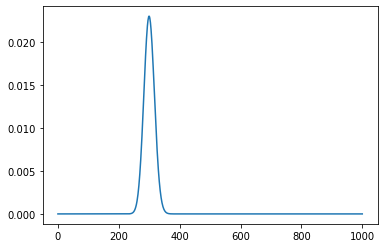

In [51]:
# Your code here
plt.plot(range(1001), arr)

# Challenge 4 - Central Limit Theorem
- In this challenge we will work with the central limit theorem
- A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.
- What is the probability that the mean delivery time today is between 30 and 35 minutes?
```python
stats.norm.cdf()
```

0.5

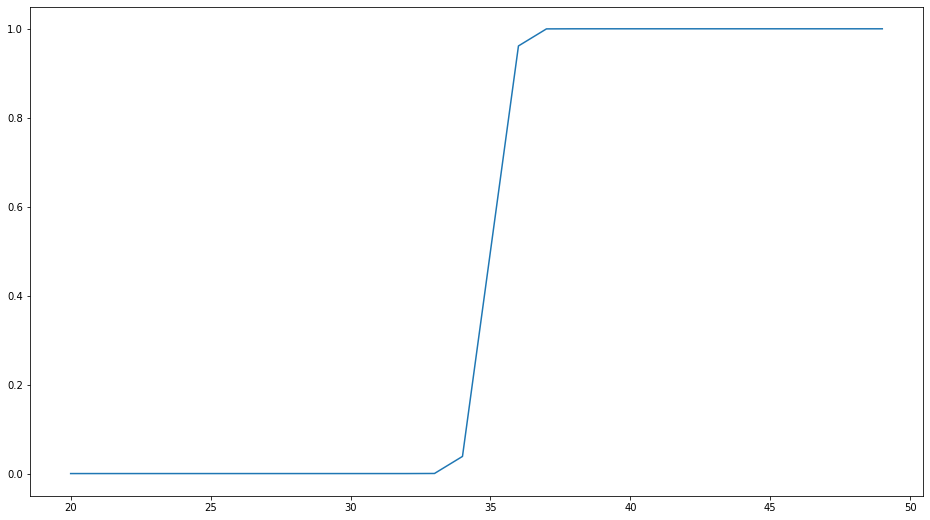

In [22]:
# Your code here
mean = 35
stddev = 8
n_sample = 200
stderror = stddev/np.sqrt(n_sample)

y = stats.norm.cdf(range(20, 50), loc=mean, scale=stderror)

fig = plt.subplots(figsize = (16,9))
plt.plot(range(20, 50), y)

y3035 = stats.norm.cdf(35, loc=mean, scale=stderror) - stats.norm.cdf(30, loc=mean, scale=stderror)
y3035

#### What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [26]:
# Your code here
time = 115*60
mean_per_package = time/200

1 - stats.norm.cdf(mean_per_package, loc=mean, scale=stderror)

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.
- Find the probability that the monthly sales are more than 300.
```python
stats.norm.cdf()
```


0.006209665325776159

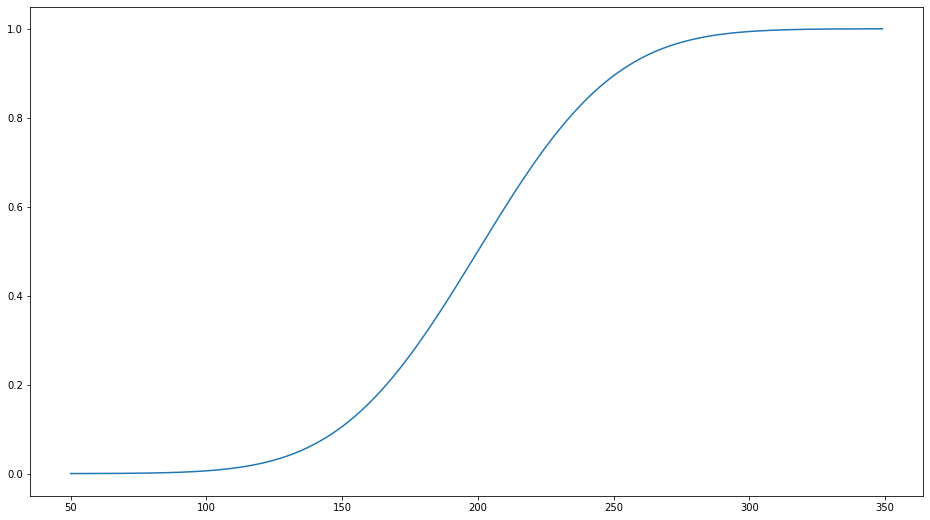

In [36]:
# Your code here
mean = 200
stddev = 40

y = stats.norm.cdf(range(50, 350), loc=mean, scale=stddev)
fig = plt.subplots(figsize = (16,9))
plt.plot(range(50, 350), y)

1 - stats.norm.cdf(300, loc=mean, scale=stddev)

#### Find the probability that the monthly sales fall between 160 and 240.

In [29]:
# Your code here
stats.norm.cdf(240, loc=mean, scale=stddev) - stats.norm.cdf(160, loc=mean, scale=stddev)

0.6826894921370859

#### Find the probability that the monthly sales do not exceed 150.

In [30]:
# Your code here
stats.norm.cdf(150, loc=mean, scale=stddev)

0.10564977366685535

#### Find the probability that the monthly sales exceed 3000.

In [31]:
# Your code here
1 - stats.norm.cdf(3000, loc=mean, scale=stddev)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.
- Find the probability that in a particular month there is no violent robbery.
```python
stats.poisson.cdf()
```

0.018315638888734182

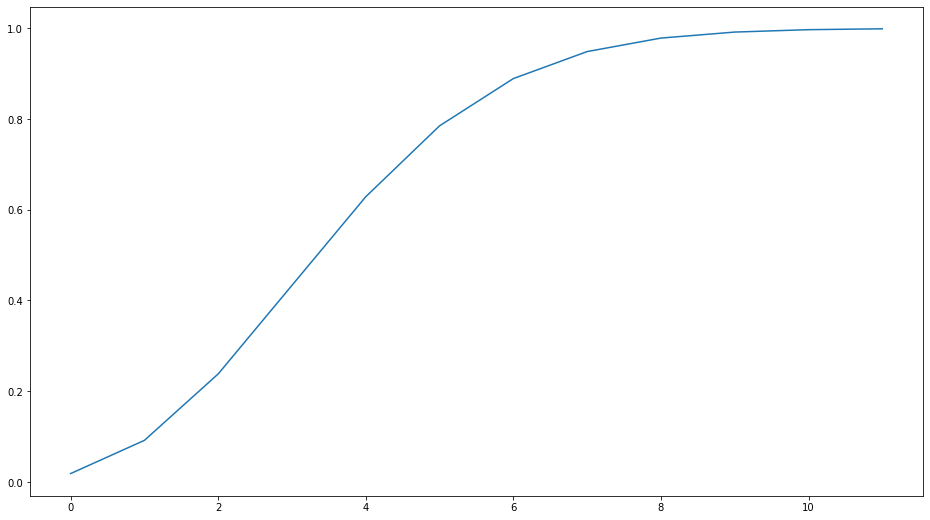

In [55]:
# Your code here

y = stats.poisson.cdf(range(0, 12), mu=4)
fig = plt.subplots(figsize = (16,9))
plt.plot(range(0, 12), y)

stats.poisson.cdf(0, mu=4)

#### Find the probability that there are at least 1 robbery in a given month.

In [44]:
# Your code here
stats.poisson.cdf(1, mu=4)

0.0915781944436709

#### Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [45]:
# Your code here
stats.poisson.cdf(6, mu=4) - stats.poisson.cdf(2, mu=4)

0.6512227160438819

#### Find the probability that there are more than 2 robberies in 15 days.

In [48]:
# Your code here

1 - stats.poisson.cdf(2, mu=4/2)

0.3233235838169366